<a href="https://colab.research.google.com/github/forfourr/test-repo/blob/main/scikit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
print(iris.DESCR)

In [ ]:
data = iris.data
label = iris.target
columns = iris.feature_names

In [ ]:
data = pd.DataFrame(data, columns = columns)
data.head(10)


In [ ]:
data.shape

In [ ]:
#데이터 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, label,
                                                    test_size=0.2,
                                                    random_state=2023)    #8:2비율로 나눔눔
print("train {}, test {}".format(X_train.shape, X_test.shape))

## LogisticRegression(calssificaiton)
    ✅주로 이진분류하는데 사용된다
    iris data는 mutliclassification이다.
    label 종류가 2개 이상

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()   #학습모델 만들어줌 

In [ ]:
#학습시킴
lr.fit(X_train, y_train)

In [ ]:
#학습시킨 모델에 test하기기
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
#예측한 y_pred와 원본데이터 y_test의 비교
print("정확도{}".format(accuracy_score(y_test, y_pred)))

In [ ]:
print("logistic \n 계수(w):{}\n 절편(b):{} ".format(lr.coef_,lr.intercept_))

^ 각각의 특성들에 대한 기울기 4개가 label 3개마다 나와있다.

* 0번 [-0.44734561  0.8926404  -2.33623964 -1.03295779]
* 1번 [ 0.49390809 -0.33483512 -0.19125056 -0.85050783]
* 2번 [-0.04656248 -0.55780528  2.5274902   1.88346562]


In [ ]:
# sigmoid 함수로 표현



## SVM(Support Vector Machine)
    Margin을 최대화 하는 벡터를 찾아야한다
    회기, 분류 모두 가능

In [ ]:
from sklearn.svm import SVC
svc = SVC()     #학습모델 가져오기

In [ ]:
#training
svc.fit(X_train, y_train)
#Predict
y_pred = svc.predict(X_test)

In [ ]:
print("정확도 :{}".format(accuracy_score(y_test, y_pred)))

SVC의 모델에서 C의 값을 조절 -> c의 값과 margin은 반비례

In [ ]:
# 적절한 c의 값 찾기
for i in [0.1, 0.4, 1, 10, 50, 100, 500]:
    svc = SVC(C=i)
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    print("정확도 :{}\n".format(accuracy_score(y_test, y_pred)))

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#모델 만들기
dt = DecisionTreeClassifier(max_depth=4)

#Training
dt.fit(X_train, y_train)

#predict
y_pred = dt.predict(X_test)

#accuacy
print("accuracy score : {}".format(accuracy_score(y_test, y_pred)))

In [ ]:
for d in [1,2,3,4,5,6,7]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    print("d={}, accuracy score : {}".format(d, accuracy_score(y_test, y_pred)))

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

tree = export_graphviz(dt,     # 의사결정나무 모형 대입
                        out_file = None,  # file로 변환할 것인가
                        feature_names = iris.feature_names,  # feature 이름
                        class_names = iris.target_names,  # target 이름
                        filled = True,           # 그림에 색상을 넣을것인가
                        rounded = True,          # 반올림을 진행할 것인가
                        special_characters = True)   # 특수문자를 사용하나

graph = graphviz.Source(tree)              
graph

## d

In [ ]:
import os
from os.path import join

abal_path = join('.','abalone.txt')
col_path = join('.', 'abalone_attributes.txt')

abalone_col = list()

In [ ]:
for i in open(col_path):
    abalone_col.append(i.strip())

In [ ]:
abalone_col

In [ ]:
data = pd.read_csv(abal_path, header =None, names=abalone_col)
data.head(10)

In [ ]:
#data 조건 주기
data_2 = data[data['Sex']!='I']
data_2.head(10)

In [ ]:
#라벨벨 문자열을 숫자로로
label_2 = data['Sex'].map(lambda x:0            #x 기본값 = 0
                          if x=='M' else 1)     #Sex != M이면1
print(label_2)

In [ ]:
#data에서 라벨열 삭제
del data_2['Sex']
data_2.head(10)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_2,label_2,
                                                    test_size=0.2,
                                                    random_state=2023)


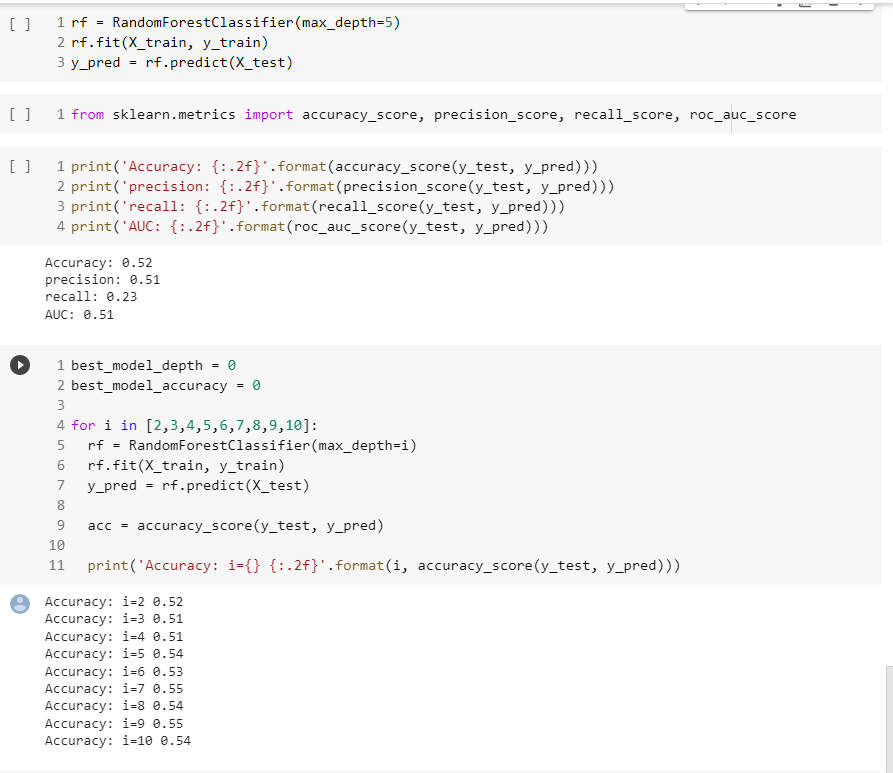

